In [1]:
from google.colab import drive
drive.mount('/content/drive') #if you have ./MyDrive or something as the base of your filepath you need to put that here

Mounted at /content/drive


In [2]:
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities.
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

import torch
import detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

Cloning into 'detectron2'...
remote: Enumerating objects: 15819, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15819 (delta 31), reused 43 (delta 17), pack-reused 15743 (from 1)
Receiving objects: 100% (15819/15819), 6.39 MiB | 11.69 MiB/s, done.
Resolving deltas: 100% (11523/11523), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.3 MB/s eta 0:0

In [3]:
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.checkpoint import DetectionCheckpointer

In [4]:
image_directory = "/content/drive/MyDrive/GestureRecognition/ajou_ust_augmented_images/black_and_white/val"
weights_path = "/content/drive/MyDrive/GestureRecognition/ajou_ust_augmented_images/black_and_white/no_gesture_label_removed/model_weights/model_final_BW95percent.pth"
val_directory = "/content/drive/MyDrive/GestureRecognition/ajou_ust_augmented_images/black_and_white/val" #included no_gesture label now

/content/drive/MyDrive/GestureRecognition/ajou_ust_augmented_images/black_and_white/val/one_finger_right_2_rot_-20.jpg


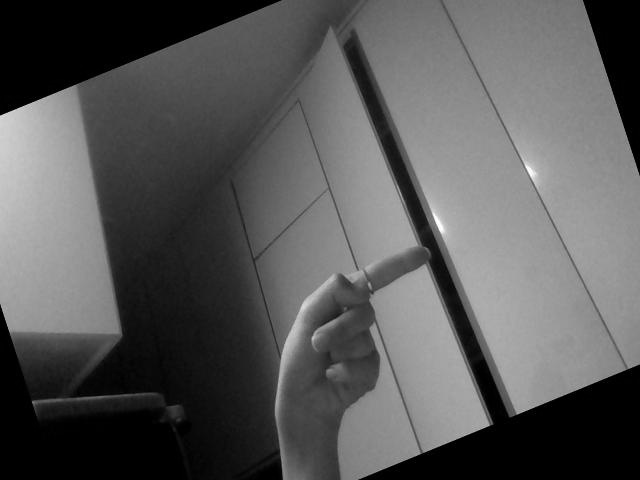

(480, 640)


In [33]:
image_list = os.listdir(image_directory)
image_path = os.path.join(image_directory, image_list[0])
print(image_path)
img = cv2.imread(image_path)
cv2_imshow(img)
# for i in range(len(img[:,1,:])):
#   print(img[i,:,2])
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img2.shape)

In [7]:
#set up the detectron model
cfg = get_cfg()
cfg.MODEL.WEIGHTS = weights_path
# cfg.MODEL_DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.4   # set a custom testing threshold
cfg.DATALOADER.NUM_WORKERS = 2
predictor = DefaultPredictor(cfg)


[12/11 23:35:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from detectron2://ImageNetPretrained/MSRA/R-50.pkl ...


R-50.pkl: 102MB [00:00, 313MB/s]                            

[12/11 23:35:37 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......


[12/11 23:35:37 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 54


backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
  fc1000.{bias, weight}
  stem.conv1.bias


try #3

In [16]:
#set up filepaths for validation data
base_val_files = os.listdir(val_directory)
val_files = []
for i in range(len(base_val_files)):
  val_files.append(os.path.join(val_directory, base_val_files[i]))

#set up model for validation
cfg.MODEL.WEIGHTS = weights_path
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 7
predictor = DefaultPredictor(cfg)

#unregister datasets
dataset_name = "my_test_dataset"
if dataset_name in DatasetCatalog.list():
  DatasetCatalog.remove(dataset_name)
  MetadataCatalog.remove(dataset_name)

#set up the dataset for testing
def get_test_dataset():
    dataset_dicts = []
    for i, file_path in enumerate(val_files):
        dataset_dicts.append({
            "file_name": file_path,
            "image_id": i,
            "annotations": []  # Empty annotations for test images
        })
    return dataset_dicts

def get_test_dataset_one_image():
  dataset_dicts = []
  dataset_dicts.append({
    "file_name": val_files[0],
    "image_id": 0,
    "annotations": []  # Empty annotations for test images
  })
  return dataset_dicts

print(val_files[0])
DatasetCatalog.register(dataset_name, get_test_dataset_one_image)
MetadataCatalog.get(dataset_name).set(thing_classes=["fist", "palm", "ok", "tnf", "one_finger_left", "one_finger_right"])

# Access metadata
test_metadata = MetadataCatalog.get(dataset_name)

[12/11 23:38:23 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/GestureRecognition/ajou_ust_augmented_images/black_and_white/no_gesture_label_removed/model_weights/model_final_BW95percent.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

/content/drive/MyDrive/GestureRecognition/ajou_ust_augmented_images/black_and_white/val/one_finger_right_2_rot_-20.jpg


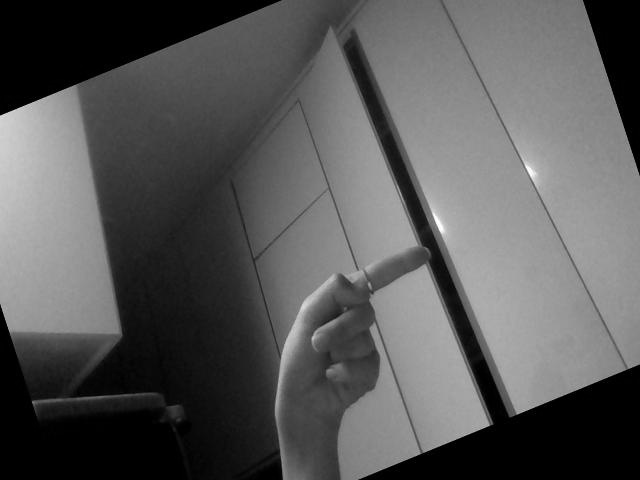

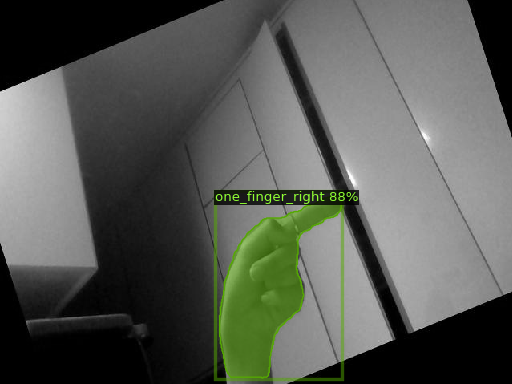

[5]
['one_finger_right']


In [17]:
#Code from Roboflow-Custom-Detectron2.ipynb from Facebook
from detectron2.utils.visualizer import ColorMode
import glob

pred_classes = []
actual_classes = []
imagePath = val_files[0]
if(imagePath.endswith(".jpg") == True):
  #read in image and visualize it
  im = cv2.imread(imagePath)
  cv2_imshow(im)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata,
                scale=0.8
                )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])
  instances = outputs["instances"].to("cpu")

  if len(instances) > 0:
      pred_classes_list = instances.pred_classes.tolist()
      pred_scores = instances.scores.tolist()
      best_score_idx = pred_scores.index(max(pred_scores))
      best_class = pred_classes_list[best_score_idx]
      best_score = pred_scores[best_score_idx]
      pred_class = best_class
  else:
      pred_class = 6
  pred_classes.append(pred_class)

  # Read the images actual json label
  json_file_path = imagePath.replace(".jpg",".json")
  if os.path.exists(json_file_path):
      with open(json_file_path, 'r') as file:
          data = json.load(file)
      label = data['shapes'][0]['label']  # Adjust index if there are multiple shapes
  else:
      print(f"No JSON file found for image: {imagePath}")
      label = None  # or some placeholder value indicating no label
  actual_classes.append(label)

print(pred_classes)
print(actual_classes)

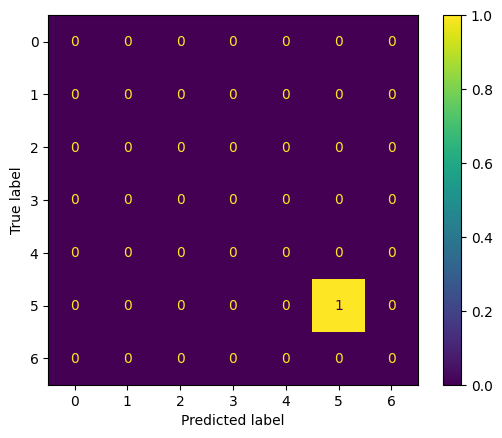

accuracy = 1.0


In [18]:

# Map actual classes from strings to integers
actual_class_map = {
    'fist': 0,
    'palm': 1,
    'ok': 2,
    'tnf': 3,
    'one_finger_left': 4,
    'one_finger_right': 5,
    'no_gesture': 6 #this shouldn't get triggered if running with the "no_gesture" label removed
}
actual_classes_nums = []
for i in range(len(actual_classes)):
    #print(actual_classes[i])
    actual_classes_nums.append(actual_class_map[actual_classes[i]])

# Update pred_classes based on the same mapping logic
for i in range(len(pred_classes)):
    if pred_classes[i] == -1:
        pred_classes[i] = 6  # Label as no gesture



#convert list from jsons to ints from strings
actual_classes_nums = np.array([int(x) for x in actual_classes_nums])
# print(pred_classes)
# print(actual_classes_nums)

#prepare confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

actual_classes_nums = np.array(actual_classes_nums)
pred_classes = np.array(pred_classes)

#generate and plot confusion matrix
cm = metrics.confusion_matrix(actual_classes_nums, pred_classes, labels=[0, 1, 2, 3, 4, 5, 6])
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4, 5, 6])
disp.plot()
plt.show()

num_true_positives = np.sum(np.diag(cm))
accuracy = num_true_positives / np.sum(cm)
print("accuracy = " + str(accuracy))